# Charpter 2

## Problem 2.1

Ex. 2.1 Suppose each of K-classes has an associated target tk, which is a
vector of all zeros, except a one in the kth position. Show that classifying to
the largest element of $\hat{y}$ amounts to choosing the closest target, $min_k||t_k − \hat{y}||$, if the elements of ˆy sum to one.

If $y_k=max(y)$ $T(y)=t_k$. Using Eq.(2.23) with $G_k => t_k$, $x=>\hat{y}$, $||t_k - \hat{y}||^2=y_1^2+..+(1-y_k)^2+..+y_K^2$ 

Because $max(\hat{y})<1$, $max(Pr(T|Y=\hat{y})) = min_k||t_k-\hat{y}||$

## Problem 2.2

Show how to compute the Bayes decision boundary for the simulation example in Figure 2.5.

Decission boundary is where classes probabilities are equil. In considered case the vounndary is Pr(y=1|X=x)=Pr(y=0|X=x)=0.5
It is not clear what exact distribution in the book. Below there is simple case of two 2D normal distributions with different mean. Boundary in 2D plane is pdf1(x1,x2) = pdf2(x1,2)) (1). 

In [169]:
y=rep(0, 200)
y[101:200]=1

In [126]:
nd = function(x1, x2, mu1, mu2){
    return(1/sqrt(2*pi)*exp(-(x1-mu1)^2/2-(x2-mu2)^2/2))
    }

For simplicity for first and second distribution for x1 means $\mu_{11}=\mu_{21}$
In this case solution of Eq. (1) $x2 = (\mu_{12} + \mu_{22})/2$

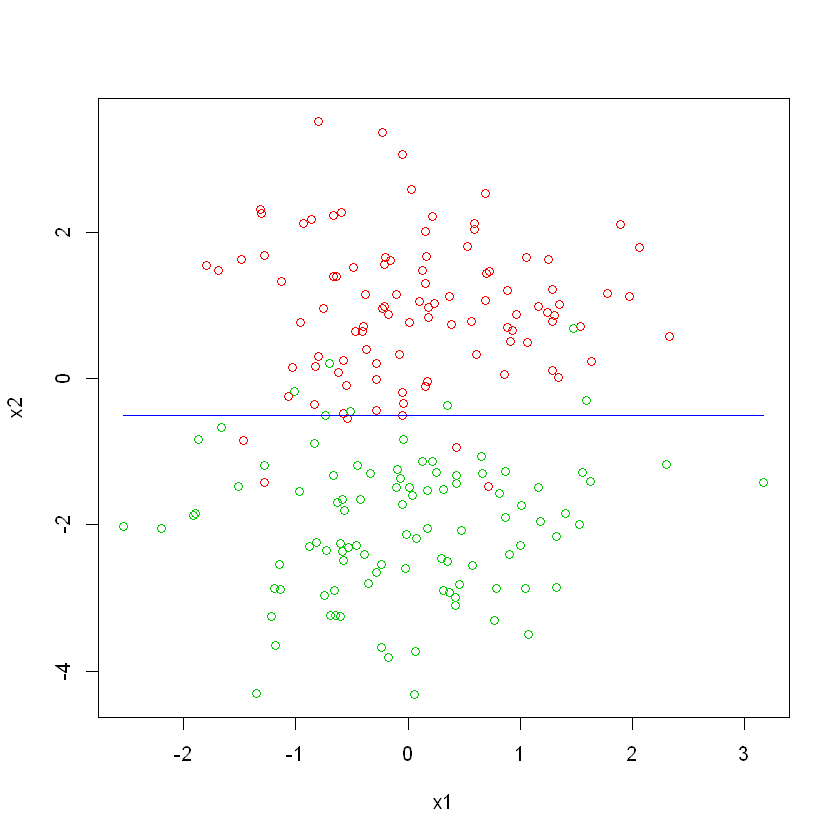

In [137]:
set.seed(4)
x1=rnorm(200, mean= 0)
x2=rnorm(200, mean= 1)
x1[101:200]=rnorm(100, mean = 0)
x2[101:200]=rnorm(100, mean = -2)
df=data.frame(cbind(x1,x2))
x1=df$x1
x2=df$x2
plot(x1, x2, col=y+2)
x2 = rep(-1/2, 200)  ##(mean12+mean21)/2
lines(x1, x2, col='blue', type='l')
#curve(nd(x1, x2, 1, 1)-nd(x1, x2, -2, -2), -5:5)

## Problem 3

Ex. 2.3 Derive equation (2.24).

Median distance corresponds to the volume where half of the particles is inside the volume and half is outside. Probability that particle is inside volume fraction v equils probability that observation is outside volume v, $(1-v)^{N} = 1-(1-v)^N ->v =1-0.5^{1/N}$ then $d(N, p)=(1-0.5^{1/N})^{1/p}$

## Problem 4

$z_i$ are projections of unit vector. Initial vector point in random direction randomly. Therefore it is clear that for projections in any direction we will be uniformly distributed and have mean zero. For mean distance vector $\sqrt{\sum_{i=0}^n\sum_{j=0}^px_{ij}^2/N}=p$.
Because the vectors orientation is uniformly distributed in all directions, if sum in all directions equals p, for one direction we divide it by p:
$\sigma =\sqrt{\sum_{i=0}^n{x_{ij}^2}/N}=1$

## Problem 5

(a) Derive equation (2.27). The last line makes use of (3.8) through a
conditioning argument.

I added $f(x_0)=x_0^T\beta$ to the equation as
$E_{y_0|x_0}E_{\tau}((y_0-f(x_0))-((\hat{y_0}-f(x_0))^2=E_{y_0|x_0}E_{\tau}(y_0-f(x_0))^2-2E_{y_0|x_0}E_{\tau}((y_0-f(x_0))(\hat{y_0}-f(x_0)))+E_{y_0|x_0}E_{\tau}(\hat{y_0}-f(x_0))^2$ =

The first term is $Var(y_0|x_0)$, the last term is $Var(\hat{y_0})+Bias(\hat{y_0})$ from Eq.(2.25) (to derive(2.25) we need to add and sutract $E_{\tau}(\hat{y_0})$ from initial equation), term in the middle goes to 0. We have

$Var(y_0|x_0)+Var(\hat{y_0})+Bias(\hat{y_0})$ = 

Using $\hat{y_0}=x_0^T\beta+\sum_{i=1}^NX^T(X^TX)^{-1}x_0\epsilon_i$ and there is no bias we have result

$\sigma^2 + E_{\tau}x_0^T(X^TX)^{-1}x_0\sigma^2+0^2$


(b) Derive equation (2.28), making use of the cyclic property of the trace
operator [trace(AB) = trace(BA)], and its linearity (which allows us
to interchange the order of trace and expectation).

Taking trace and using cycling property

$\sigma^2 + E_{x_0}tr(x_0^TCov(X^{-1})x_0)\sigma^2/N = \sigma^2 + E_{x_0}tr(Cov(X^{-1})x_0^Tx_0)\sigma^2/N = \sigma^2 + tr(Cov(X^{-1})E_{x_0}(x_0^Tx_0))\sigma^2/N = Tr(Cov(X^{-1})Cov(x_0))\sigma^2/N + \sigma^2$

$Tr(Cov(X^{-1})Cov(x_0))=tr(I_p) = p$ we get result

$=\sigma^2p/N+\sigma^2$

## Problem 6

Consider a regression problem with inputs xi and outputs yi, and a
parameterized model $f_θ(x)$ to be fit by least squares. Show that if there are
observations with tied or identical values of x, then the fit can be obtained
from a reduced weighted least squares problem

We minimize RSS(f)=$\sum_{i=1}^n(y_i-f(x_i))^2$ if we have j identical x_i mean $\hat{y}_i=\sum_j{y_{ji}}/n_j$. Substituting to RSS

RSS(f) = $\sum_{i=1}^{n'}n_i(\hat{y}_i-f(x_i))^2$, where $n'$ is number of groups

## Problem 7

Suppose we have a sample of N pairs xi, yi drawn i.i.d. from the
distribution characterized as follows:
xi ∼ h(x), the design density
yi = f(xi) + εi, f is the regression function
εi ∼ (0, σ2) (mean zero, variance σ2)
We construct an estimator for f linear in the yi,
$\hat{f}(x_0) = \sum_{i=1}^Nℓ_i(x_0;X)yi,$
where the weights ℓi(x0;X) do not depend on the yi, but do depend on the
entire training sequence of xi, denoted here by X.

(a) Show that linear regression and k-nearest-neighbor regression are members
of this class of estimators. Describe explicitly the weights ℓi(x0;X)
in each of these cases.

For linear regression $f(x)=x^T\beta$ then the estimator $\hat{f}(x_0)=\sum_{i=1}^N{(XX^TX)_iy_i}$

For K nearest neighbours $\hat{f}(x_0) = 1/k\sum_i I_{xinN_k(x_0)}y_i$

b) Decompose the conditional mean-squared error
$E_{Y|X} (f(x_0) − \hat{f}(x_0))^2$
into a conditional squared bias and a conditional variance component.
Like X, Y represents the entire training sequence of yi.

$E_{Y|X} (f(x_0) − \hat{f}(x_0))^2 = E_{Y|X} ((f(x_0)- E_{Y|X} f(x_0)) + (E_{Y|X} f(x_0) − \hat{f}(x_0)))^2= E_{Y|X}(f(x_0)- E_{Y|X} f(x_0))^2 + (E_{Y|X} f(x_0) − \hat{f}(x_0))^2 = Var(f(X))+Bias(f(X))^2$ 

(c) Decompose the (unconditional) mean-squared error $E_{Y,X} (f(x_0) − \hat{f}(x_0))^2$ into a squared bias and a variance component.

$E_{Y,X} (f(x_0) − \hat{f}(x_0))^2 = E_{Y,X} ((f(x_0)- E_{Y,X} f(x_0)) + (E_{Y,X} f(x_0) − \hat{f}(x_0)))^2= E_{Y,X}(f(x_0)- E_{Y,X} f(x_0))^2 + (E_{Y,X} f(x_0) − \hat{f}(x_0))^2 = Var(f(x_0))+Bias(\hat{f}(x_0))^2$ 

(d) Establish a relationship between the squared biases and variances in
the above two cases.

f(X) = E(f(x)|X), so $Var(f(X))+Bias(f(X))^2 = E(Var(f(x_0))+Bias(\hat{f}(x_0))^2|x_0=X)$

## Problem 8

Compare the classification performance of linear regression and k–
nearest neighbor classification on the zipcode data. In particular, consider
only the 2’s and 3’s, and k = 1, 3, 5, 7 and 15. Show both the training and
test error for each choice. The zipcode data are available from the book
website www-stat.stanford.edu/ElemStatLearn.

In [12]:
train <- read.table("zip_train")
test <- read.table("zip_test")
## Filtering to 2’s and 3’s
train <- train[train[,1] %in% c(2, 3),]
test <- test[test[,1] %in% c(2, 3),]
pixels <- c("V1", "V3", "V5", "V7", "V15")
train <- train[,pixels]
test <- test[,pixels]
head(train)

,V1,V3,V5,V7,V15
5,3,-1,-1.00,-0.928,-1
7,3,-1,-0.83,1.000,-1
27,3,-1,-1.00,-0.104,-1
31,3,-1,-1.00,-1.000,-1
36,3,-1,-1.00,0.492,-1
42,2,-1,-1.00,-0.798,-1


In [47]:
# Linear regression.
linear.mod <- lm(train[,1]~., data=train[,-1])
predict <- predict(linear.mod, test[,2:5])
error.lin <- mean(pred.lin!=test[,1])
error.lin

[1] 0.3956044

In [49]:
require(class)
pred.knn <- knn(train[,2:5], test[,2:5], train[,1], k=6)
error.knn <- mean(pred.knn!=test[,1])
error.knn

[1] 0.4203297

knn gives a bit better error for k=6

## Problem 9

prove that
$E[R_{tr}(\hat{\beta})] ≤ E[R_{te}(\hat{\beta})]$, $R_{tr} = 1/N\sum_{i=1}^N(y_i-x_i^T\hat{\beta})^2$, $R_{te} = 1/M\sum_{i=1}^M(y_i'-x_i'^T\hat{\beta})^2$

This property is much based on fact that $\hat{\beta}$ was obtained minimizing $R_{tr}$. 
$1/N\sum_{i=1}^N(y_i-x_i^T\hat{\beta})^2 <= 1/N\sum_{i=1}^N(y_i-x_i^T\beta)^2$, for any $/beta$

Because data from the same distribution we can get rid from how many observations in the sample

$E(1/N\sum_{i=1}^N(y_i-x_i^T\hat{\beta})^2) <= E(y_i-x_i^T\beta)^2$ (1), for any beta

Now we can change beta on right side to transform to another $\beta'$ by condition $y-x\beta =  y'-x'\beta'$
inequility  will continue to hold.

The other approach is if we do minimization of $R_{te}$ on test data set and obtain $\hat{\beta}'$, then $1/N\sum_{i=1}^N(y_i-x_i^T\hat{\beta})^2 <= 1/N\sum_{i=1}^N(y_i-x_i^T\hat{\beta'})^2$, when $1/M\sum_{i=1}^M(y_i'-x_i'^T\hat{\beta'})^2<=1/M\sum_{i=1}^M(y_i'-x_i'^T\hat{\beta})^2$, from this we come to inquility we need to prove.